In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
csv_path ="Resources/winemag_data_pandata.csv"
df = pd.read_csv(csv_path)

In [3]:
df.columns


Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [4]:
df = df[["price", "points", "winery"]]

In [5]:
df.head()

,price,points,winery
0,NaN,87,Nicosia
1,15.0,87,Quinta dos Avidagos
2,14.0,87,Rainstorm
3,13.0,87,St. Julian
4,65.0,87,Sweet Cheeks


In [6]:
df = df.dropna()

In [9]:
df = df.loc[df["price"]>= 0]

In [10]:
df.min()

price         4
points       80
winery    1+1=3
dtype: object

In [12]:
# metric for wine value
df["metric"] = (df["points"]/df["price"])

C:\Users\jnovic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.head()

,price,points,winery,metric
1,15.0,87,Quinta dos Avidagos,5.800000
2,14.0,87,Rainstorm,6.214286
3,13.0,87,St. Julian,6.692308
4,65.0,87,Sweet Cheeks,1.338462
5,15.0,87,Tandem,5.800000


In [15]:
group_df = df.groupby("winery")

In [28]:
#metric for winery (sum of wine value)
value = group_df["metric"].sum()/group_df["metric"].count()

In [29]:
value.head()


winery
1+1=3               4.771759
10 Knots            3.533117
100 Percent Wine    4.796296
1000 Stories        4.763158
1070 Green          3.520000
Name: metric, dtype: float64

In [30]:
range = (value.max()-value.min())
range

20.973333333333333

In [33]:
n_bins = int(round(range/2)-1)

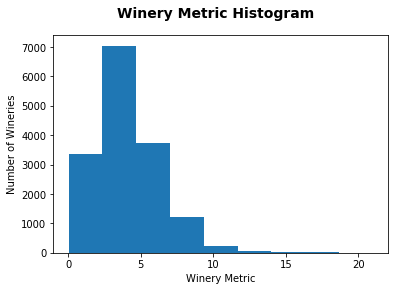

In [34]:
test, axs = plt.subplots()

axs.hist(value, bins=n_bins)
test.suptitle("Winery Metric Histogram", fontsize=14, fontweight="bold")
axs.set_xlabel("Winery Metric")
axs.set_ylabel("Number of Wineries")

plt.show()